<p style="font-family: Times New Roman;">Домашняя работа №1. Выполнил: Сафаров Нурлан. ИИТММ. ФИИТ. 4 курс. Группа: 3821Б1ФИ3.</p>

<p style="font-family: Times New Roman;"><b>Пункт №0.</b> Описание задачи.</p>

<p style="font-family: Times New Roman;">Страховая компания стремится установить конкурентоспособные тарифы на свои услуги автострахования, что подразумевает создание хорошей модели для оценки риска аварий у клиентов. Для этого необходимо анализировать данные о клиентах с целью прогнозирования вероятности предъявления ими претензий на страховые выплаты в предстоящем году. Была, впрочем-то, поставлена задача бинарной классификации.</p>

In [186]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn

<p style="font-family: Times New Roman;"><b>Пункт №1.</b> Чтение данных.</p>

In [187]:
data = pd.read_csv('C:/Users/Нурлан Сафаров/Desktop/customer-data.csv')
data

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True



<p style="font-family: Times New Roman;">Как мы видим, у нас имеется 19 признаков:</p>

<p style="font-family: Times New Roman;">
1. <strong>id</strong> — уникальный номер <br>
2. <strong>age</strong> — возраст клиента <br>
3. <strong>gender</strong> — пол клиента <br>
4. <strong>race</strong> — принадлежность к группе <br>
5. <strong>driving_experience</strong> — водительский стаж <br>
6. <strong>education</strong> — образование <br>
7. <strong>income</strong> — уровень дохода <br>
8. <strong>credit_score</strong> — оценка платежеспособности/рейтинг доверия клиенту <br>
9. <strong>vehicle_ownership</strong> — владение транспортным средством <br>
10. <strong>vehicle_year</strong> — год выпуска автомобиля <br>
11. <strong>married</strong> — семейный статус <br>
12. <strong>children</strong> — наличие детей <br>
13. <strong>postal_code</strong> — почтовый индекс <br>
14. <strong>annual_mileage</strong> — годовой пробег авто <br>
15. <strong>vehicle_type</strong> — тип автомобиля <br>
16. <strong>speeding_violations</strong> — число нарушений правил превышения скорости <br>
17. <strong>DUIs</strong> — число штрафов за вождение в нетрезвом состоянии <br>
18. <strong>past_accidents</strong> — количество инцидентов в прошлом <br>
19. <strong>outcome</strong> — обратился ли клиент за страховыми выплатами
</p>

In [188]:
data.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

In [189]:
# Заменим True = 1 и False = 0
for i in data:
    if data[i].dtype == 'bool':
        data[i] = data[i].map({True : 1, False : 0})

data.dtypes    

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership        int64
vehicle_year            object
married                  int64
children                 int64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                  int64
dtype: object

<p style="font-family: Times New Roman;">Заменим тип "Object" на специальный, предназначенный для хранения категориальных значений:</p>

In [190]:
data["age"] = data["age"].astype('category')
data["gender"] = data["gender"].astype('category')
data["race"] = data["race"].astype('category')
data["driving_experience"] = data["driving_experience"].astype('category')
data["education"] = data["education"].astype('category')
data["income"] = data["income"].astype('category')
data["vehicle_year"] = data["vehicle_year"].astype('category')
data["vehicle_type"] = data["vehicle_type"].astype('category')


In [191]:
data["age"].dtype,data["gender"].dtype,data["race"].dtype, data["driving_experience"].dtype, data["education"].dtype, data["income"].dtype, data["vehicle_year"].dtype, data["vehicle_type"].dtype 

(CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False, categories_dtype=object))

<p style="font-family: Times New Roman;"><b>Пункт №3.</b> Визуализация данных.</p>

<p style="font-family: Times New Roman;">Получим визуализацию данных и вычислим основные характеристики, такие как средние значения, стандартное отклонение, минимальное и максимальное значения, а также медиану:</p>

In [192]:
describe_one = data.describe()
describe_one

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


<p style="font-family: Times New Roman;">Можно отметить, что средний уровень доверия клиентов не превышает 0,6. Наибольшее количество превышений скорости составляет 22, а максимальное число штрафов за вождение в состоянии алкогольного опьянения — 6.</p>

In [193]:
describe_two = data.describe(include = ['category'])
describe_two

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


<p style="font-family: Times New Roman;">Самым распространенным типом автомобиля среди клиентов является седан. Стаж вождения от 0 до 9 лет имеют 3,5 тысячи клиентов. Что касается возраста автомобилей, то почти 7 тысяч клиентов ездят на машинах, выпущенных до 2015 года.</p>

<p style="font-family: Times New Roman;">Для количественных и бинарных признаков построим матрицу корреляции:</p>

In [194]:
data_corr = data.corr(numeric_only = True)
data_corr

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
credit_score,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


<Axes: >

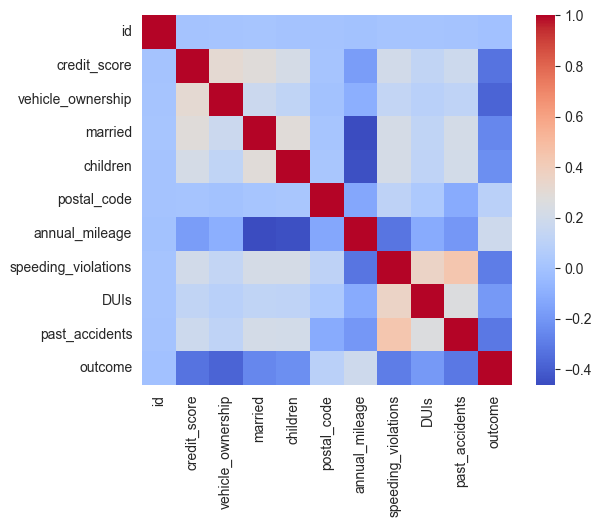

In [195]:
sns.heatmap(data_corr, square = True, cmap = 'coolwarm')

<p style="font-family: Times New Roman;">Числовые признаки не демонстрируют сильной корреляции друг с другом, однако зависимость присутствует у признаков DUIS, PAST_ACCIDENTS и SPEEDING_VIOLATIONS, поскольку они отражают количество штрафов, наложенных на клиента. Отрицательная корреляция у credit_score и outcome указывает на то, что чем чаще клиент обращается за страховкой, тем ниже его рейтинг доверия.</p>

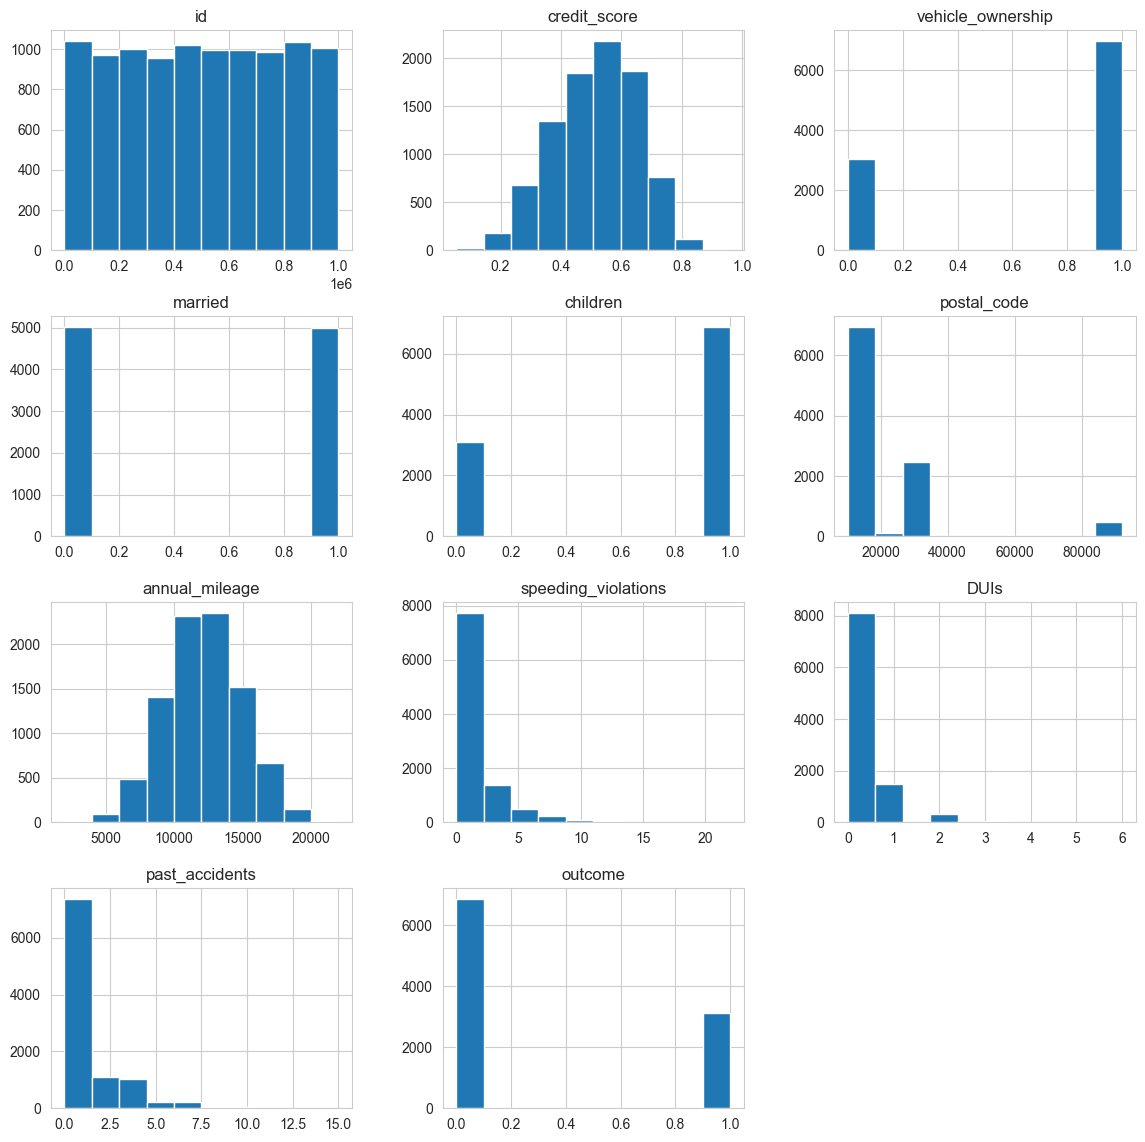

In [196]:
# Построим гистограммы распределений
sns.set_style('whitegrid')
numbers = pd.Series(data.columns)
data[numbers].hist(figsize = (14, 14))
plt.show()

<p style="font-family: Times New Roman;">Рассмотрим взаимосвязь между признаками и целевой переменной OUTCOME.</p>

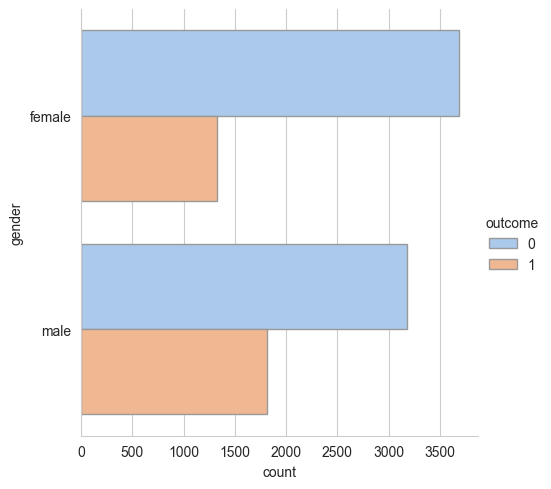

In [197]:
sns.catplot(y = "gender", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Как мы видим, женщины реже обращаются за страховкой.</p>

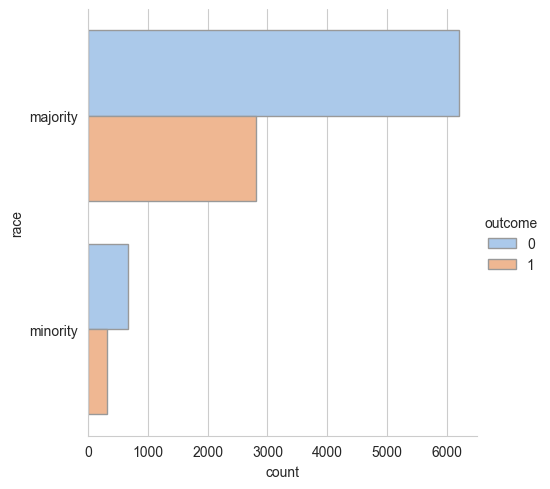

In [198]:
sns.catplot(y = "race", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

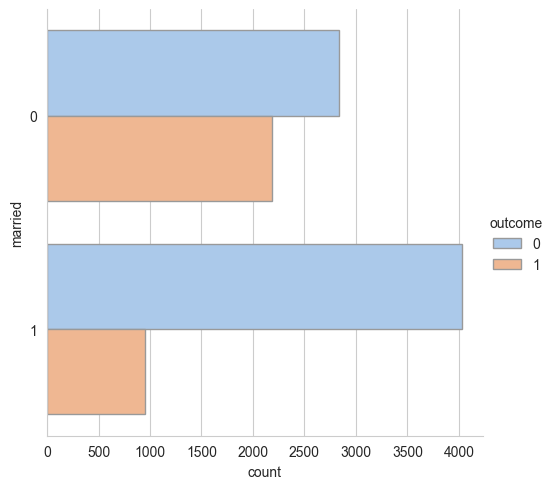

In [199]:
sns.catplot(y = "married", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

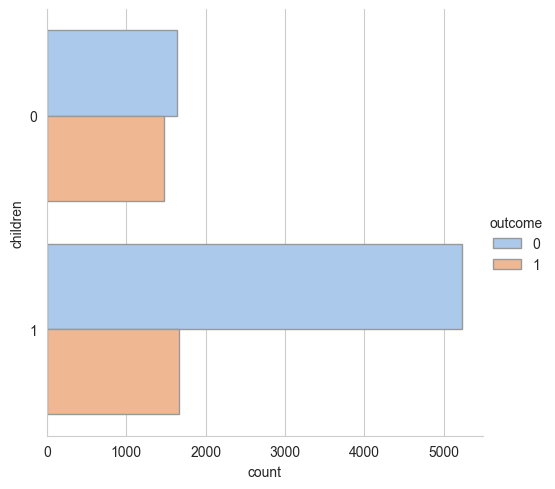

In [200]:
sns.catplot(y = "children", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Клиенты, у которых есть семья, реже обращаются за страховкой, к тому же у них ниже пробег автомобиля.</p>

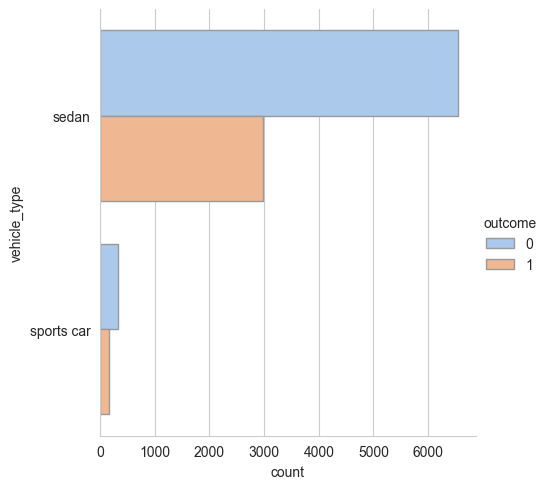

In [201]:
sns.catplot(y = "vehicle_type", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Здесь также не наблюдается зависимости от типа машины, что аналогично ситуации с расой.</p>

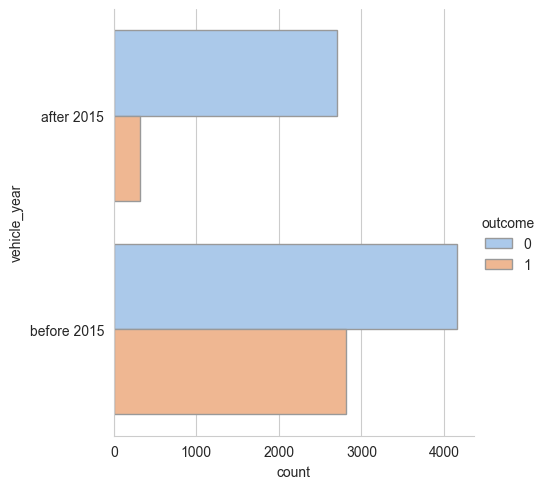

In [202]:
sns.catplot(y = "vehicle_year", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Заметим, что новые машины реже попадают в аварии.</p>

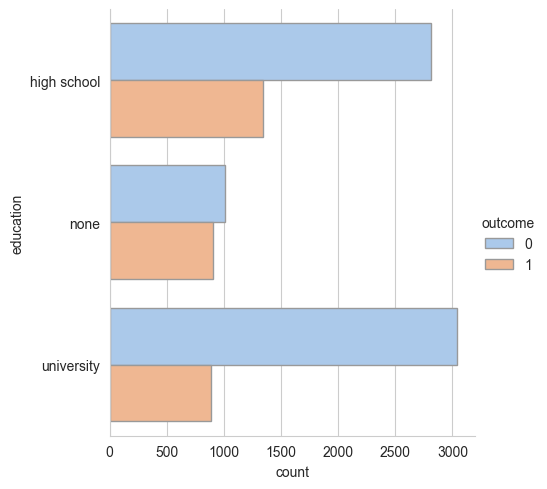

In [203]:
sns.catplot(y = "education", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

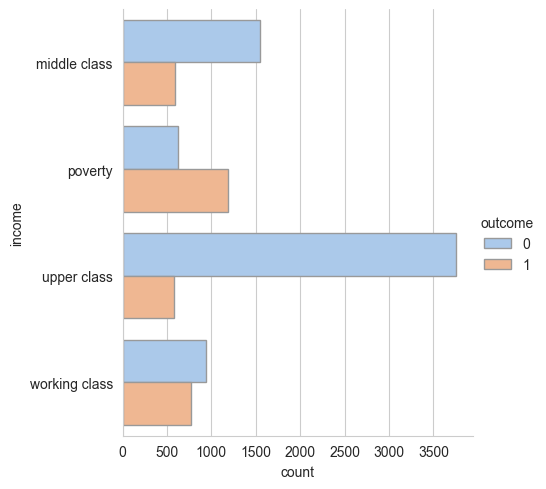

In [204]:
sns.catplot(y = "income", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Наличие образования и повышение уровня жизни увеличивают вероятность того, что клиент не будет обращаться за страховкой, поскольку он реже попадает в опасные ситуации на дороге (или провоцирует их).</p>

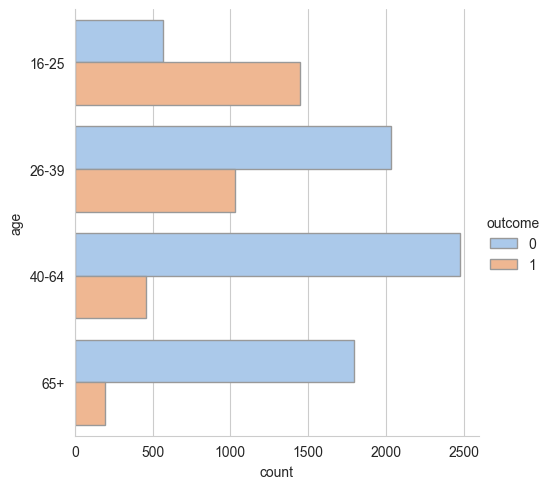

In [205]:
sns.catplot(y = "age", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">С возрастом клиенты становятся более аккуратными водителями.</p>

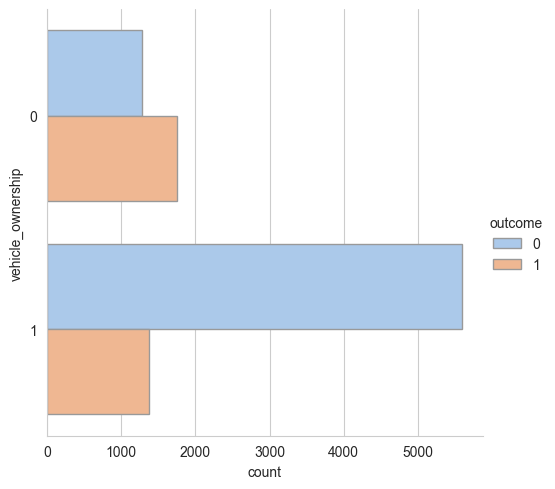

In [206]:
sns.catplot(y = "vehicle_ownership", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Можно заметить, что если клиент водит не свою машину, то, скорее всего, он воспользуется страховкой.</p>

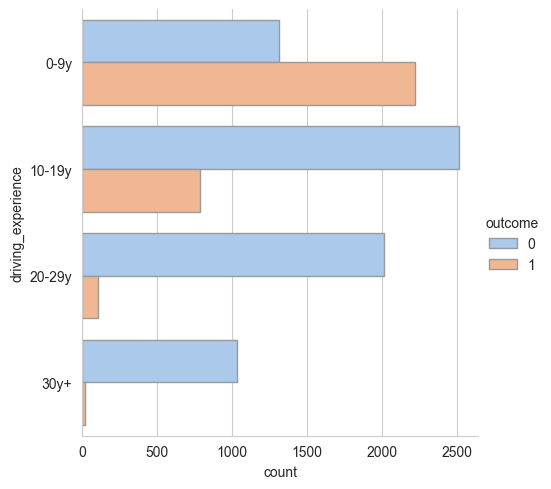

In [207]:
sns.catplot(y = "driving_experience", hue = "outcome", kind = "count", palette = "pastel", edgecolor = ".6", data = data)

<p style="font-family: Times New Roman;">Чем больше стаж клиента, тем аккуратнее он водит машину.</p>

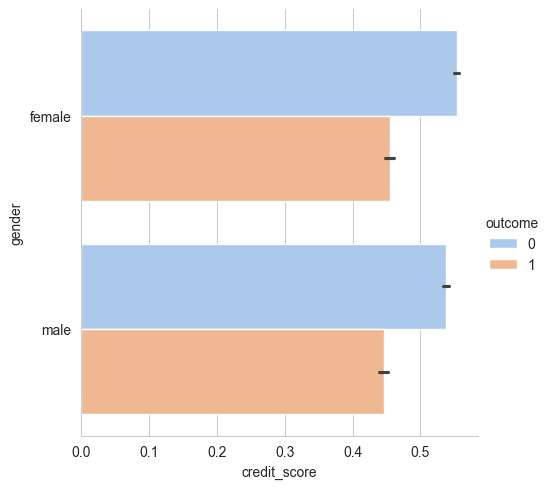

In [208]:
sns.catplot(x = "credit_score" ,y = "gender", hue = "outcome", kind = "bar", palette = "pastel", data = data)

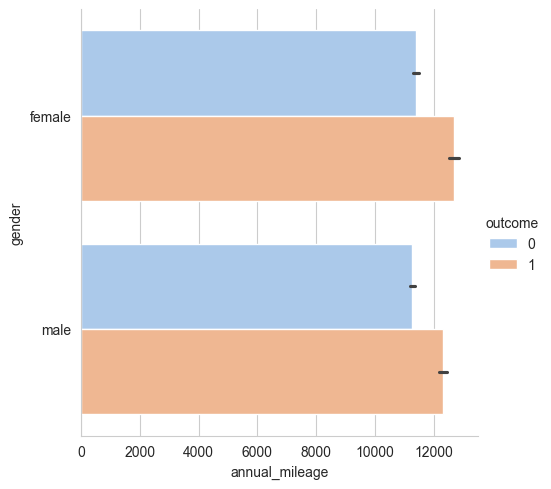

In [209]:
sns.catplot(x = "annual_mileage", y = "gender", hue = "outcome", kind = "bar", palette = "pastel", data = data)

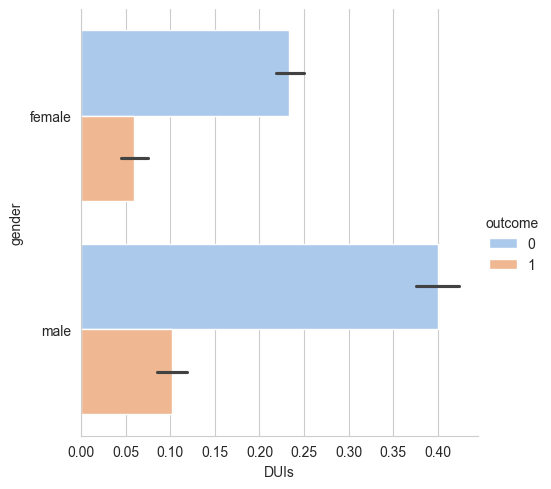

In [162]:
sns.catplot(x = "DUIs", y = "gender", hue = "outcome", kind = "bar", palette = "pastel", data = data)

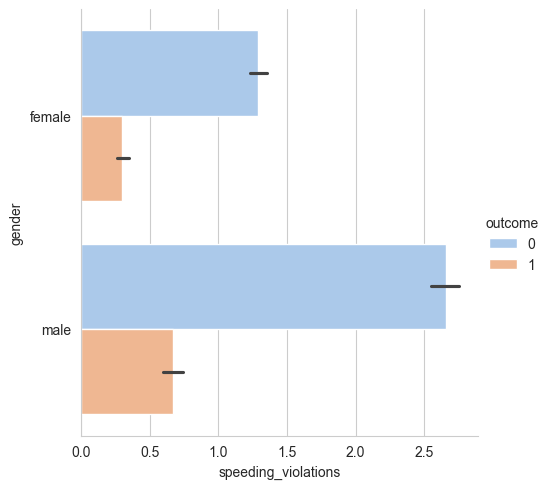

In [163]:
sns.catplot(x = "speeding_violations", y = "gender", hue = "outcome", kind = "bar", palette = "pastel", data = data)

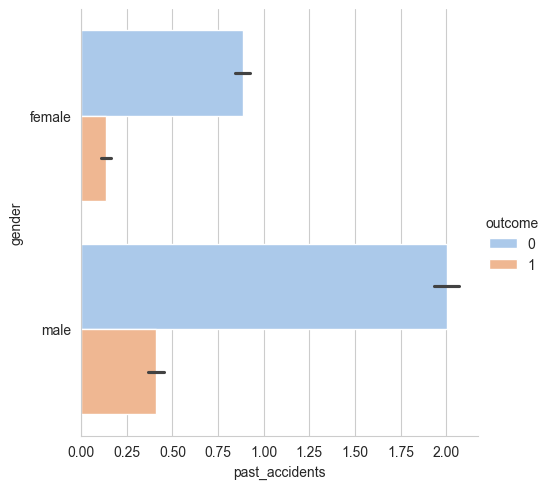

In [210]:
sns.catplot(x = "past_accidents", y = "gender", hue = "outcome", kind = "bar", palette = "pastel", data = data)

<p style="font-family: Times New Roman;">Предыдущие графики свидетельствуют о том, что пол почти не влияет на вероятность обращения за страховкой.</p>

<p style="font-family: Times New Roman;">Можно удалить столбцы ID, POSTAL_CODE и RACE, поскольку они влияют только на уникальность каждого клиента. Затем удалим получившиеся дубликаты.</p>

In [211]:
data = data.drop(columns = 'postal_code')
data  = data.drop(columns = 'race')
data  = data.drop(columns = 'id')
data  = data.drop(columns = 'vehicle_type')
print('Первоначальное количество данных:', data.shape[0])
data = data.drop_duplicates()
print('Количество данных после удаления дубликатов:', data.shape[0])

Первоначальное количество данных: 10000
Количество данных после удаления дубликатов: 9975


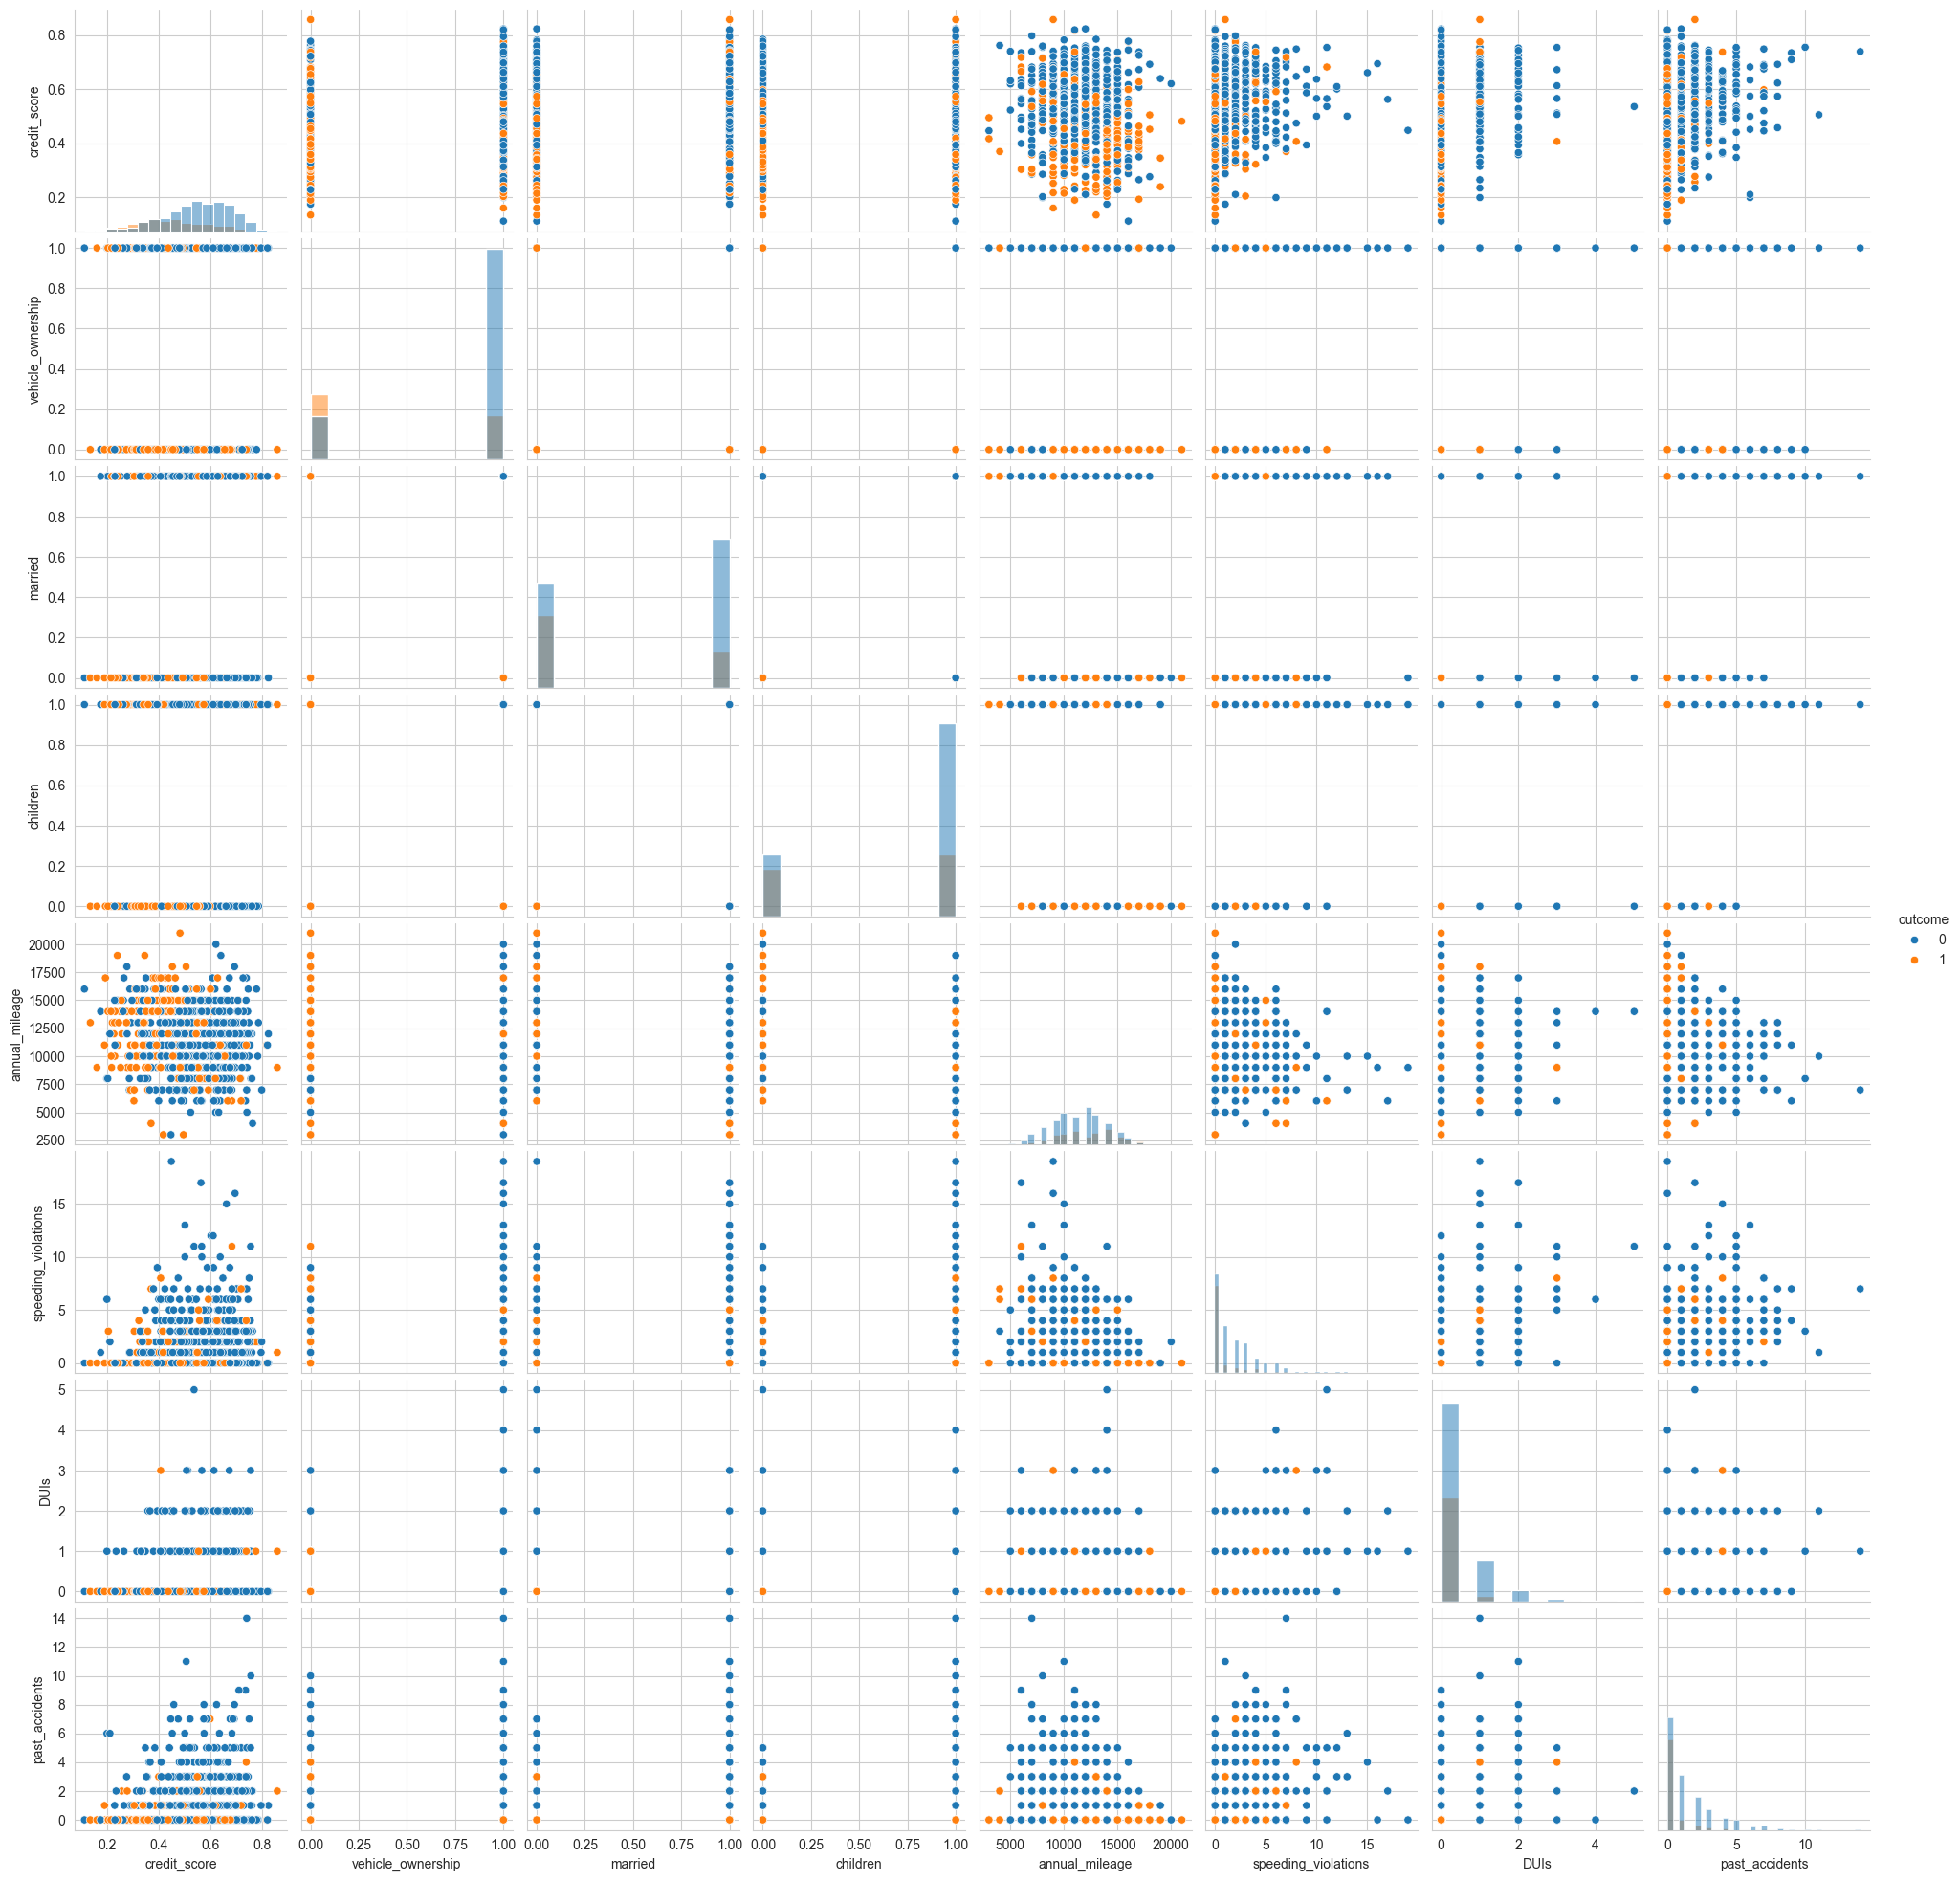

In [212]:
# Диаграмма рассеивания относительно признака OUTCOME
sns.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size = 1000, replace = False)], hue = 'outcome', diag_kind = 'hist')

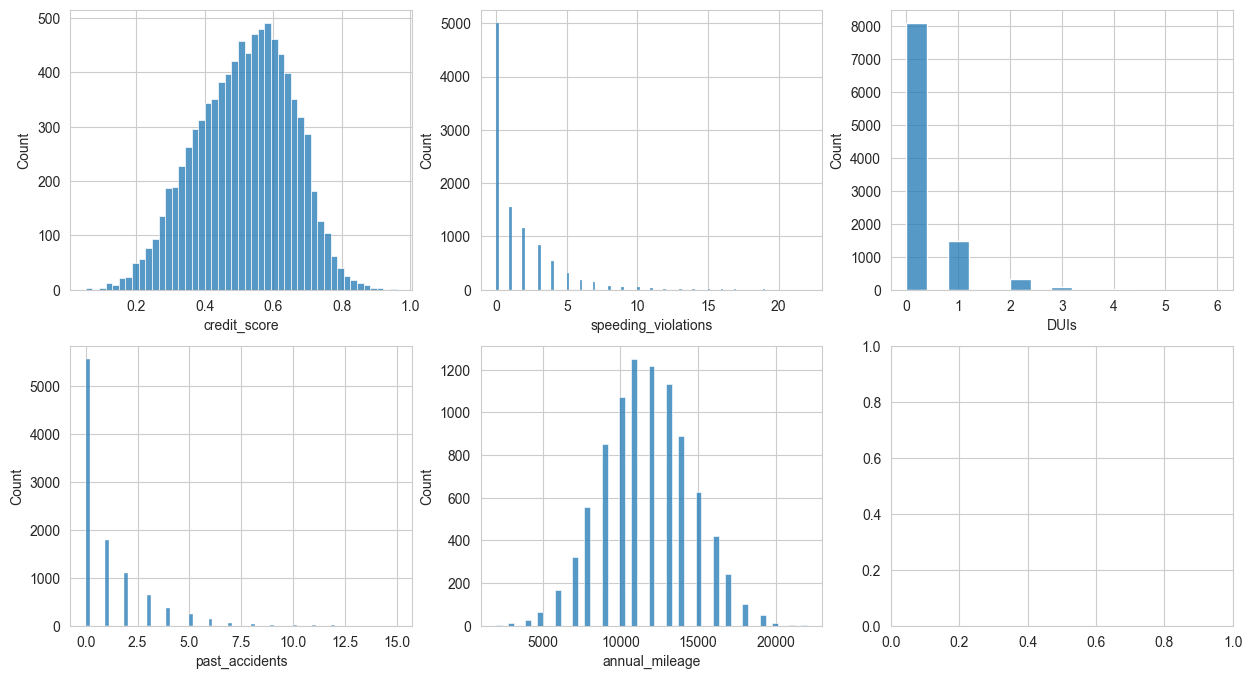

In [213]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
sns.histplot(data = data, x ='credit_score', ax = axes[0, 0]);
sns.histplot(data = data, x ='speeding_violations', ax = axes[0, 1]);
sns.histplot(data = data, x ='DUIs', ax = axes[0, 2]);
sns.histplot(data = data, x ='past_accidents', ax = axes[1, 0]);
sns.histplot(data = data, x ='annual_mileage', ax = axes[1, 1]);

<p style="font-family: Times New Roman;"><b>Пункт №3.</b> Обработать пропущенные значения.</p>

In [214]:
data.isnull().sum()

age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           957
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         952
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

<p style="font-family: Times New Roman;">Пропуски присутствуют в колонках CREDIT_SCORE и ANNUAL_MILEAGE.</p>

In [215]:
data.isnull().sum()*100/(data.count()+data.isnull().sum())

age                    0.000000
gender                 0.000000
driving_experience     0.000000
education              0.000000
income                 0.000000
credit_score           9.593985
vehicle_ownership      0.000000
vehicle_year           0.000000
married                0.000000
children               0.000000
annual_mileage         9.543860
speeding_violations    0.000000
DUIs                   0.000000
past_accidents         0.000000
outcome                0.000000
dtype: float64

<p style="font-family: Times New Roman;">Заполним пропуски медианным значением:</p>

In [216]:
values = {"credit_score": data.credit_score.median(), "annual_mileage": data.annual_mileage.median()}
data = data.fillna(value = values)

print(f'Соотношение классов: {data.outcome[data.outcome == 1].count()}/{data.outcome[data.outcome == 0].count()} (данные несбалансированы)')


Соотношение классов: 3114/6861 (данные несбалансированы)


<p style="font-family: Times New Roman;"><b>Пункт №4.</b> Обработать категориальные признаки.</p>

In [217]:
data.columns

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'speeding_violations', 'DUIs',
       'past_accidents', 'outcome'],
      dtype='object')

In [218]:
data = pd.get_dummies(data, columns = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year'], drop_first = True)

In [219]:
data.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,12000.0,0,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,0.357757,0,0,0,16000.0,0,0,0,1,False,...,True,False,False,False,True,False,True,False,False,True
2,0.493146,1,0,0,11000.0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,True
3,0.206013,1,0,1,11000.0,0,0,0,0,False,...,True,False,False,False,False,True,False,False,True,True
4,0.388366,1,0,0,12000.0,2,0,1,1,True,...,True,True,False,False,True,False,False,False,True,True


<p style="font-family: Times New Roman;"><b>Пункт №5.</b> Провести нормализацию.</p>

In [220]:
# Нормализуем данные по годовому пробегу

from sklearn.preprocessing import MinMaxScaler

minmxscaler= MinMaxScaler()
data['annual_mileage']  = minmxscaler.fit_transform(np.array(data['annual_mileage']).reshape(-1, 1))
data

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,0.50,0,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,0.357757,0,0,0,0.70,0,0,0,1,False,...,True,False,False,False,True,False,True,False,False,True
2,0.493146,1,0,0,0.45,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,True
3,0.206013,1,0,1,0.45,0,0,0,0,False,...,True,False,False,False,False,True,False,False,True,True
4,0.388366,1,0,0,0.50,2,0,1,1,True,...,True,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1,0,0,0.70,0,0,1,0,True,...,False,True,False,False,False,True,False,True,False,True
9996,0.522231,1,0,1,0.50,1,0,0,0,True,...,False,True,False,False,True,False,False,False,False,False
9997,0.470940,1,0,1,0.60,0,0,0,0,True,...,True,False,False,False,False,False,False,False,False,True
9998,0.364185,0,0,1,0.55,2,0,1,1,True,...,False,True,False,False,False,False,True,False,False,True


<p style="font-family: Times New Roman;"><b>Пункт №6.</b> Разбить данные на обучающую и тестовую выборки.</p>

In [221]:
from sklearn.model_selection import train_test_split


y = data['outcome']
x = data.drop(['outcome'], axis = 1)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 42)

<p style="font-family: Times New Roman;"><b>Пункт №7.</b> Запустить классификатор ближайших соседей или другой метод.</p>

0.0007161271841879118 0.23053792181757435
Accuracy Score train : 99.92838728158121
Accuracy Score test : 76.94620781824256


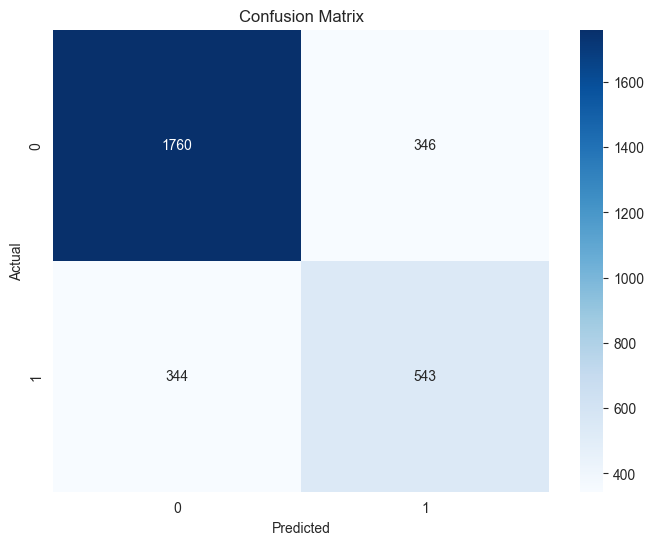

In [222]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore") 

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

neighbours = [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30]
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

# Создание confusion matrix
cm_knn = confusion_matrix(y_test, y_test_predict)
# print("Confusion matrix")
# print(cm_knn)

# Визуализация confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = True, yticklabels = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<p style="font-family: Times New Roman;"><b>Пункт №8.</b> Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра. Сделать выводы.

In [223]:
errs_train = []
errs_test = []

for i in neighbours:    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict  = model.predict(x_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
mat = pd.DataFrame([errs_train, errs_test], columns = neighbours,index=["errs_train", "errs_test"])
mat  

,1,2,3,4,5,7,10,15,20,25,30
errs_train,0.000716,0.116156,0.114580,0.138642,0.136351,0.147379,0.159840,0.166571,0.168290,0.169292,0.173303
errs_test,0.230538,0.206482,0.200468,0.190110,0.188774,0.192115,0.181757,0.179753,0.172736,0.177080,0.178750


0.16929246634202233 0.17707985299031073
Accuracy Score train : 83.07075336579777
Accuracy Score test : 82.29201470096893


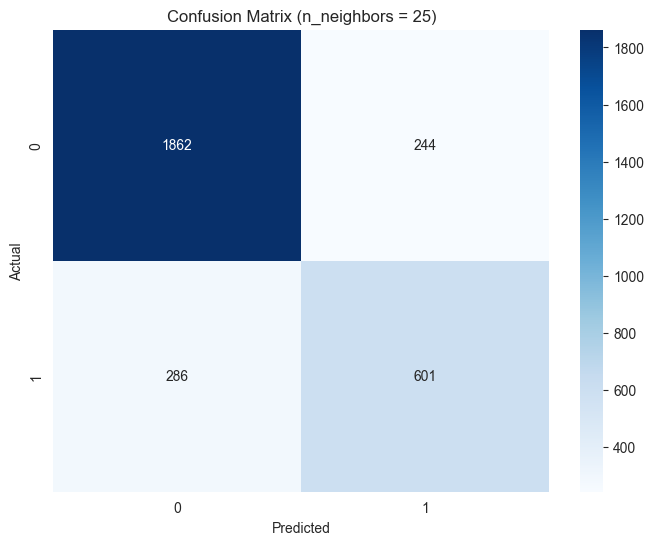

In [224]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore") 

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создание и обучение модели с n_neighbors = 25
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

# Вывод ошибок и точности
print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

# Создание confusion matrix
cm_knn = confusion_matrix(y_test, y_test_predict)
# print("Confusion matrix")
# print(cm_knn)

# Визуализация confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = True, yticklabels = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n_neighbors = 25)')
plt.show()

0.17244342595244916 0.17741396592048111
Accuracy Score train : 82.75565740475508
Accuracy Score test : 82.2586034079519


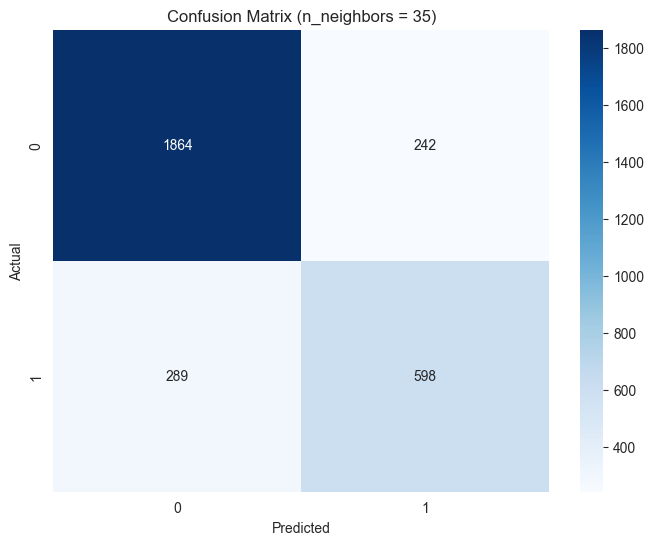

In [225]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore") 

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создание и обучение модели с n_neighbors = 35
model = KNeighborsClassifier(n_neighbors = 35)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

# Вывод ошибок и точности
print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

# Создание confusion matrix
cm_knn = confusion_matrix(y_test, y_test_predict)
# print("Confusion matrix")
# print(cm_knn)

# Визуализация confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = True, yticklabels = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n_neighbors = 35)')
plt.show()

<p style="font-family: Times New Roman;"><b>Вывод:</b><br> Метод был протестирован с различными значениями параметра k. Определение класса по ближайшему соседу при k = 1 показало точность классификации ~99% на обучающей выборке и ~77% на тестовой выборке. С увеличением k до 25 было получено оптимальное значение параметра, и точность классификации составила ~83% на обучающей выборке и ~82,3% на тестовой выборке.</p>